In [3]:
import scipy as sp
import matplotlib.pyplot as plt
import autograd.numpy as np
from scipy import optimize
from autograd.numpy.linalg import inv as Inv
from autograd.numpy import transpose as T
from autograd import grad, jacobian, hessian
from src.plots import show_plot_contour, show_plot_3d
import matplotlib.pylab as pylab
params = {
    'legend.fontsize': 'small',
    'legend.loc': 'best',
    'axes.grid': 'True',
    'axes.labelsize': 'small',
    'axes.titlesize':'small',
    'xtick.labelsize':'x-small',
    'ytick.labelsize':'x-small'
}
pylab.rcParams.update(params)

## 1.1 Constrained Optimization
**Definition**\
Consider a problem with the next level of complexity having equality constraints
\begin{align}
\underset{y}{\min} F(y)\\
\text{s.t. } f(y) = 0
\end{align}

To simplify the notation, assume that the p-state vector $x$ can be separted into a decision m-vector $u$ and a state n-vector $x$ related to the decision variables through the constraints.

\begin{align}
\underset{u}{\min} F(x, u)\\
\text{s.t. } f(x,u)=0
\end{align}

Assume that $p>n$ otherwise the problem is completely or over specified by the constraints.

One solution approach is direct substitution, which involves:
- Solving for $x$ in terms of $u$ using $f$
- Substitute the expression into $f$ and solve for $u$ using unconstrained optimization.
- Works best if $f$ is linear being the assumption not both $f$ and $F$ are linear.

**Example**
\begin{align}
&\min_x &F(x) = x_1^2 + x_2^2\\
&\text{s.t. }& x_1 + x_2 + 2 = 0
\end{align}

- Clearly the unconstrained minumum is $x_1 = x_2 = 0$
- Substitution in this case gives the equivalent problems:

\begin{align}
\underset{x_2}{\min} \tilde{F}_2 = (-2-x_2)^2 x_2^2
\end{align}

or

\begin{align}
\underset{x_1}{\min} \tilde{F}_1 = x_1 + (-2-x_1)^2 x_2^2
\end{align}

for which the solution 
\begin{align}
\frac{\partial{\tilde{F}_2}}{\partial x_2} = 0, \text{ where } x_1=x_2=-1
\end{align}

The substitution works well for linear constraints but difficult to generalize for larger systems having non linear constraints.

## 1.2 Lagrange Multipliers
Since $f(x,u)=0$, we can adjoin it to the cost with constants:

\begin{align}
\lambda^T = [\lambda_1,\cdots,\lambda_n]
\end{align}

without changing the function value along the constraint to create Lagrangian function:

\begin{align}
L(x,u,\lambda)=F(x,u) + \lambda^T f(x,u)
\end{align}

Given values of x and u for which f(x,u)=0, consider differential changes to the Lagrangian from differential changes to x and u:

\begin{align}
dL=\frac{\partial L}{\partial x}dx + \frac{\partial L}{\partial u}du
\end{align}

where $\frac{\partial L}{\partial u}=[\frac{\partial L}{\partial u_1}, \cdots, \frac{\partial L}{\partial m}]$

Since $u$ are the decision variables it is convenient to choose $\lambda$ so that:

\begin{align}
\frac{}{} \triangleq \frac{\partial F}{\partial x} + \lambda^T \frac{\partial f}{\partial x} \equiv 0\\
dx = -\frac{\partial f}{\partial x}^{-1} \frac{\partial f}{\partial u}du
\end{align}

Then the allowable cost variations are:

\begin{align}
dF&=\frac{\partial F}{\partial x} dx + \frac{\partial f}{\partial u}du\\
&=\big( -\frac{\partial F}{\partial x} (\frac{\partial f}{\partial x})^{-1} \frac{\partial f}{\partial u}+ \frac{\partial F}{\partial u} \big)du\\
&= \left( \frac{\partial F}{\partial u} + \lambda^T \frac{\partial f}{\partial u}\right)du\\
&\equiv \frac{\partial L}{\partial u}du
\end{align}

So the gradient of the cost $F$ with respect to $u$ while keeping the constraint $f(x,u)=0$ is just:

\begin{align}
\frac{\partial L}{\partial u}
\end{align}

and we need this gradient to be 0 to have a stationary point so that $dF=0$ for all $du \ne 0$.

Thus the necessary conditions for a stationary valur of F are:
\begin{align}
\frac{\partial L}{\partial x} &= 0 \qquad (2.11)\\
\frac{\partial L}{\partial u} &= 0\\
\frac{\partial L}{\partial \lambda} &= f(x, u)= 0
\end{align}

These solutions give the stationary points.

The constrained solution will be a point of tangency of the constant cost curves and constraint functions and no further improvements possible while satisfying the constraints.

Equivalent to saying that the gradient of the cost function $\frac{\partial F}{\partial y}$ must lie in the space spanned by the constraints gradients $\frac{\partial f}{\partial x}$.

Cost cannot be improved without violating the constraints
In two dimensional case, that corresponds to $\frac{\partial F}{\partial y}$ being colinear to $\frac{\partial f}{\partial y}$.

If this were not true, then it would be possible to take $dy$ in the negative of the direction of the component of the cost gradient orthogonal to the constraint gradient, thereby reducing the cost and still satisfying the constraint.

The generalization of being colinear to larger state dimensions to notion that the cost gradient must lie in the space spanned by the constraint gradients.

Equivalent to saying that it is possible to express the cost gradient as a linear combination opf the constraint gradients.

Otherwise, improvements can be made to the cost without violating the constraints.

The constrained minimum, there must exist constants such that the cost gradient satisfies:
\begin{align}
\frac{\partial F}{\partial y} &= -\lambda_1\frac{\partial f_1}{\partial y} - \lambda_2\frac{\partial f_2}{\partial y}-\cdots-\lambda_n\frac{\partial f_n}{\partial y}\\
&= -\lambda^T\frac{\partial f}{\partial y}\\
&\equiv \frac{\partial F}{\partial y} + \lambda^T\frac{\partial f}{\partial y} = 0
\end{align}

which is the same as Eq.(2.11).

**Example 1.2.1** 
\begin{align}
\textbf{min}_x F(x_1,x_2) &= x_1^2 + x_2^2\\
\textbf{s.t.}\qquad f(x_1, x_2) &= x_1 + x_2 + 2 = 0
\end{align}

Form the Lagrangian:

\begin{align}
L \triangleq F(x_1, x_2) + \lambda f(x_1, x_2) = x_1^2 + x_2^2 + \lambda (x_1 + x_2 + 2)
\end{align}

where $\lambda$ is the Lagrange multiplier.

The solution approach without constraints is to find the stationary point of:

\begin{align}
F\big(x_1, x_2\big)\big(\frac{\partial F}{\partial x_1}=\frac{\partial F}{\partial x_2}=0\big)
\end{align}

with contraints, we find the stationary points of L:

\begin{align}
y=\left[\array{x_1\\x_2}\right], \frac{\partial L}{\partial y}=0, \frac{\partial L}{\partial \lambda}=0
\end{align}

which gives:

\begin{align}
\frac{\partial L}{\partial x_1} &= 2x_1 + \lambda = 0\\
\frac{\partial L}{\partial x_2} &= 2x_2 + \lambda = 0\\
\frac{\partial L}{\partial \lambda} &= x_1 + x_2 + 2 = 0\\
\end{align}

Due to constraints resulting to 3 equations and 3 unknowns where $x_1^* = x_2^* = -1$, the selection of $x_1$ and $x_2$ during the minimization are not independent, thus the Lagrange multiplier captures the dependency.


Recall the identity from linear algebra:
\begin{align}
Ax &= B\\
\text{where: }&\\
A :& \quad \mathbb{R}^{nxm}\\
B :& \quad \mathbb{R}^n
\end{align}

Construct the array components to solve:

\begin{align}
\left[\array{
2,0,1\\
0,2,1\\
1,1,0\\
}\right]\left[\array{
x_1\\x_2\\\lambda
}\right]=\left[\array{
0\\0\\-2
}\right]
\end{align}

\begin{align}
\text{Now, solve for x:}&\\
x = A^{-1}b
\end{align}

In [4]:
# Solve x using linear solver
A = np.array(
    [[2,0,1],
    [0,2,1],
    [1,1,0]], dtype=float
)
b = np.array([0,0,-2], dtype=float)
sol = np.linalg.solve(A, b)
print("Solver: ", sol)

# Solve x using matrix algebra
A_inv = Inv(A)
x_star = np.dot(T(A_inv),b)
print(f"x_star: {x_star}")
assert (x_star == sol).all()

Solver:  [-1. -1.  2.]
x_star: [-1. -1.  2.]


In [5]:
# Numerical solution using scipy
# Objective function
f = lambda x: x[0]**2 + x[1]**2

# Initial values
x_a = np.array([-6.,6.], dtype=float)

# Construct the constraints
constraint1 = ({"type": "eq", "fun": lambda x: x[0] + x[1] + 2})
constraints = ([constraint1,])

# Capture optimization path
path = list()
path.append(x_a)
def callback(arg):
    path.append(arg)

    # Run optimizer
ret = optimize.minimize(f, x_a, constraints=constraints, callback=callback)
x_star = ret.x
print(f"Minimizer x*: {x_star}")

# Convert to np type
path = np.array(path)
#print(path)

Minimizer x*: [-0.99996408 -1.00003592]


### 1.2.1 Inequality Constraints
Consider the problem

\begin{align}
\underset{y}{\min} F(y)\\
\textbf{s.t.}\quad f(y) \leq 0
\end{align}

Assume that there are $n$ constraints, but do not need to constrain $n$ with respect to the state dimension $p$ since not all inquality constraints will limit a degree of freedom of the solution.

todo plots:

Intuition in this case is that at the minimum, the cost gradient must lie in the space spanned by the active constraints, so split as:

\begin{align}
\frac{\partial F}{\partial y} = \underset{\text{active}}{-\sum_i \lambda_i \frac{\partial f_i}{\partial y}} - \underset{\text{inactive}}{\sum_j \lambda_j \frac{\partial f_j}{\partial y}} \qquad (1.3.1)
\end{align}

If the constraint is inactive, then we can set $\lambda_j = 0$

With equality constraints, needed the cost and function gradients to be collinear, but they could be in any orrientation

For inequality constraints, need and additional constraint that is related to the allowable changes in the state:
- Must restrict condition Eq.(1.3.1) so that the cost gradient points in the direction of the allowable side of the constraint $(f<0)$.
* Cost cannot be reduced without violating constraint
* Cost and function gradients must point in opposite directions
- Given Eq.(1.3.1) require that $\lambda_i > 0$ for active constraints.

As a summary, we define the Lagrangian as $L=F+\lambda^Tf$

with necessary conditions as:

\begin{align}
\frac{\partial L}{\partial y} &= 0 \qquad &1.3.2\\
\lambda_i\frac{\partial L}{\partial \lambda_i} &= 0, \text{ for all } i \qquad &1.3.3
\end{align}

where the second property applies to all constraints
- Active constraints have $\lambda_i \geq 0$ and satisfy $\frac{\partial L}{\partial \lambda_i} = f_i = 0$
- Inactive constraints have $\lambda_i = 0$ and satisfy $\frac{\partial L}{\partial \lambda_i} = f_i \lt 0$

Eq.(1.3.2) and Eq.(1.3.3) are the parts of the Karush-Kuhn-Tucker Theorem of non-linear programming.



### 1.2.2 Cost Sensitivity
Often the constraints in the problem are picked arbitrarily with some flexibility in the limits. Thus, it would be good to establish the extent to which those choices must impact the solution.

Note that at the solution point:

\begin{align}
\frac{\partial L}{\partial y} = 0 \rightarrow \frac{\partial F}{\partial y} = -\lambda^T\frac{\partial f}{\partial y}
\end{align}

If the state changes by $\triangle y$, would expect change in the 
\begin{align}
\text{Cost } &\triangle F = \frac{\partial F}{\partial y}\triangle y\\
\text{Constraint } &\triangle f = \frac{\partial f}{\partial y}\triangle y\\
\end{align}

So then we have:
\begin{align}
\triangle F &= -\lambda^T\frac{\partial f}{\partial y}\triangle y = -\lambda^T \triangle f\\
\rightarrow \frac{dF}{df} &
= -\lambda^T
\end{align}

Sensitivity of the cost changes in the constraint functionis given by the Lagrange multipliers.

Active constraints $\lambda \geq 0$, so expect that $\frac{dF}{df} \leq 0$
if constraint is active, increase in $f$ will move the constraint boundary in the direction of reducing $F$.

### 1.2.3 Another Derivation of Cost sensitivity
- Revise the constraints so that they are of the form $f \leq c$, where $c \geq 0$ is a constant that is nominally $0$
- The constraints can be rewritten as $\frac{\partial \bar{f}}{\partial y} \equiv \frac{\partial f}{\partial y}$

and assuming $\bar{f}$ constraint remains active as we change $c$:

\begin{align}
\frac{\partial \bar{F}}{\partial y} \equiv \frac{\partial f}{\partial y} - \mathbb{I} = 0
\end{align}

Note that at the solution point
    
\begin{align}
\frac{\partial L}{\partial y} = 0 \Rightarrow \frac{\partial F}{\partial y} = -\lambda^T\frac{\partial \bar{f}}{\partial y} = -\lambda^T\frac{\partial f}{\partial y}
\end{align}

To study cost sensityivity, we must compute $\frac{\partial F}{\partial c}$. Note that:

\begin{align}
\frac{\partial F}{\partial c} &= \frac{\partial F}{\partial c}\frac{\partial y}{\partial c}\\
&= -\lambda^T\frac{\partial F}{\partial y}\frac{\partial y}{\partial c} \\
&= -\lambda^T\frac{\partial f}{\partial c}\\
&= -\lambda^T
\end{align}



**Example 1.4.1** Consider the minimization case

\begin{align}
\min(F)&=x_1^2 + x_1x_2 + x_2^2\\
s.t.&\\
x_2 &\geq 1\\
x_1 + x_2 &\leq 3
\end{align}


**Step 1** Form the Lagrangian
\begin{align}
L = x_1^2 + x_1x_2 + x_2^2 + \lambda_1(1-x_2) + \lambda_2(x_1 + x_2 -3)
\end{align}

**Step 2** Construct the necessary conditions
\begin{align}
\frac{\partial L}{\partial x_1} &= 2x_1 + x_2 + \lambda_2 = 0\\
\frac{\partial L}{\partial x_2} &= x_1 + 2x_2 - \lambda_1 + \lambda_2 = 0\\
\lambda_1 \frac{\partial L}{\partial \lambda_1} &= \lambda_1(1-x_2)\\
\lambda_2 \frac{\partial L}{\partial \lambda_2} &= \lambda_2(x_1 + x_2 - 3) = 0\\
\end{align}

**Step 3** Consider various assumptions\
***Assumption 1***: $\lambda_1 = \lambda_2 = 0$, where both constraints are inactive
\begin{align}
\frac{\partial L}{\partial x_1} &= 2x_1 + x_2 = 0\\
\frac{\partial L}{\partial x_2} &= x_1 + 2x_2 = 0
\end{align}

gives solution $x_1 = x_2 = 0$ as expected, but does not satisfy all constraints

***Assumption 2***: $\lambda_1 = 0$ (inactive), $\lambda_2 \geq 0$ (active)
\begin{align}
\frac{\partial L}{\partial x_1} &= 2x_1 + x_2 + \lambda_2 = 0\\
\frac{\partial L}{\partial x_2} &= x_1 + 2x_2 + \lambda_2 = 0\\
\lambda_2\frac{\partial L}{\partial \lambda_2} &= \lambda_2(x_1 + x_2 -3) = 0
\end{align}

which gives the solution $x_1 = x_2 = \frac{3}{2}$, and satisfies the constraints, but $F=6.75$ and $\lambda_2=-\frac{9}{2}$

***Assumtion 3***: $\lambda_1 \geq 0$ (active), $\lambda_2 = 0$ (inactive)
\begin{align}
\frac{\partial L}{\partial x_1} &= 2x_1 + x_2 = 0\\
\frac{\partial L}{\partial x_2} &= x_1 + 2x_2 - \lambda_1 = 0\\
\lambda_2\frac{\partial L}{\partial \lambda_2} &= \lambda_1(1 - x_2) = 0
\end{align}

Gives solution $x_1=-\frac{1}{2}$, $x_2=1$, $\lambda_1=\frac{3}{2}$, and satisfies the constraints, and $F=0.75$

\begin{align}
\left[\array{
2  &1  &0 &1\\
1  &2 &-1 &1\\
0 &-1  &0 &0\\
1 &1  &0 &0\\
}\right] 
\left[\array{
x_1\\x_2\\\lambda_1\\\lambda_2
}\right] &= \left[\array{
0\\0\\1\\3
}\right]\\\\
Ax &= b
\end{align} 

In [7]:
# Matrix Algebra
A = np.array([
    [2,1,0,1],
    [1,2,-1,1],
    [0,-1,0,0],
    [1,1,0,0],
], dtype=float)
b = np.array([0,0,1,3], dtype=float)
ret = np.dot(T(Inv(A)), b)
print(f"(x_1,x_2,lambda_1, lambda_2) = {ret}")

# Solve x using matrix algebra
A_inv = np.linalg.inv(A)
x_star = np.dot(np.transpose(A_inv),b)
print(f"x*: {x_star}")
#assert (x_star == sol).all()

(x_1,x_2,lambda_1, lambda_2) = [ 4. -1. -5. -7.]
x*: [ 4. -1. -5. -7.]


In [6]:
# Numerical solution using scipy
# Objective function
f = lambda x: x[0]**2 + x[0]*x[1] + x[1]**2

# Initial values
x_a = np.array([4.,-1.], dtype=float)

# Construct the constraints
constraint1 = ({"type": "ineq", "fun": lambda x: x[1] - 1})
constraint2 = ({"type": "ineq", "fun": lambda x: (x[0] + x[1]) + 3})
constraints = ([constraint1, constraint2])

# Capture optimization path
path = list()
path.append(x_a)
def callback(arg):
    path.append(arg)

# Run optimizer
ret = optimize.minimize(f, x_a, constraints=constraints, callback=callback)
x_star = ret.x
print(f"Minimizer x* => x1: {x_star[0]:.6f} x2: {x_star[0]:.6f}")

# Convert to np type
path = np.array(path)

Minimizer x* => x1: -0.500000 x2: -0.500000


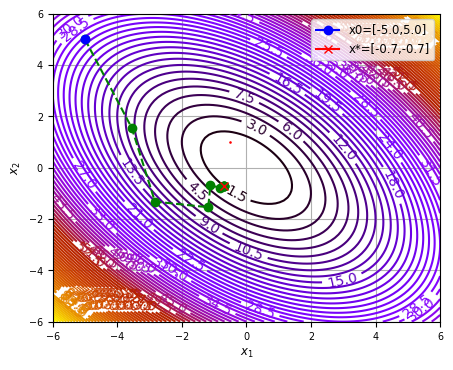

In [15]:
f = lambda x: x[0]**2 + x[0]*x[1] + x[1]**2
domain = [-6,6]
samples = 100
x1 = np.linspace(domain[0], domain[1], samples)
x2 = np.linspace(domain[0], domain[1], samples)
z = np.zeros(([len(x1), len(x2)]))
for i in range(0, len(x1)):
    for j in range(0, len(x2)):
        z[j, i] = f([x1[i], x2[j]])
fig = plt.figure(figsize=(5,4))
contour=plt.contour(x1, x2, z, samples, cmap=plt.cm.gnuplot)
plt.clabel(contour, inline=1, fontsize=10)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
if path is not None:
    # Gradient descent path
    plt.plot(path[:,0], path[:,1], "go--")
    # Initial values
    x_a, x_star = path[0], path[-1]
    plt.plot(x_a[0], x_a[1], c="b", marker="o", label="x0=[{x0:.1f},{x1:.1f}]".format(x0=x_a[0],x1=x_a[1]))
    plt.plot(x_star[0], x_star[1], c="r", marker="x", label="x*=[{x0:.1f},{x1:.1f}]".format(x0=x_star[0],x1=x_star[1]))
z1 = np.zeros([1,1])
z1[0,0]=.75
plt.scatter(-.5, 1, s=.75, marker="o",color="r")
plt.legend(fontsize="small")
plt.show()


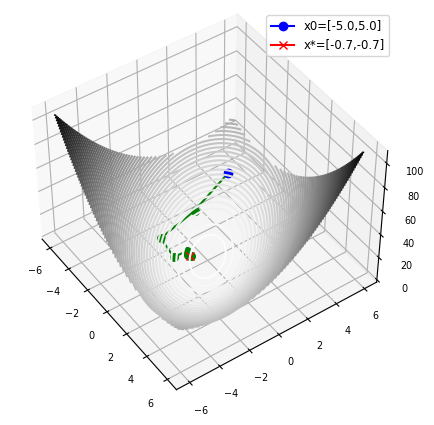

In [16]:
x0_i = np.linspace(domain[0],domain[1], samples)
x1_i = np.linspace(domain[0],domain[1], samples)
x, y = np.meshgrid(x0_i, x1_i)
z = f(([x,y]))
fig = plt.figure(figsize=(6,5))
ax = plt.axes(projection="3d")
ax.contour3D(x, y, z, samples, cmap="binary")
ax.view_init(45,-35)
# Gradient descent path
if path is not None:
    plt.plot(path[:,0], path[:,1], "go-", ms=5.5)
    # Initial values
    plt.plot(path[0][0], path[0][1], c="b", marker="o",\
             label="x0=[{x0:.1f},{x1:.1f}]".format(x0=path[0][0],x1=path[0][1]))
    plt.plot(path[-1][0], path[-1][1], c="r", marker="x",\
             label="x*=[{x0:.1f},{x1:.1f}]".format(x0=path[-1][0],x1=path[-1][1]))
    plt.legend(fontsize="small")
plt.show()

**Example 1**: Single Constraint
\begin{align}
&\max &f(x,y) = x+y\\
&\text{s.t. } &x^2 + y^2 = 1
\end{align}

The maximum is at $(\frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}})$

The minimum is at $(-\frac{1}{\sqrt{2}}, -\frac{1}{\sqrt{2}})$

**Solution**

Forming the constraint:
\begin{align}
g(x,y)=x^2 + y^2 -1
\end{align}

Hence, the Lagrangian function is

\begin{align}
\mathcal{L}(x,y,\lambda)&=f(x,y) + \lambda\cdot g(x,y)\\
&= x + y + \lambda(x^2 + y^2 -1)
\end{align}

Note that $\mathcal{L}$ is equal to $f(x,y)$ when $g(x,y)=0$ or inactive.

We now calculate the gradient

\begin{align}
\triangledown_{x,\lambda}\mathcal{L}(x,y,\lambda) &= \left(\frac{\partial\mathcal{L}}{\partial x}, \quad \frac{\partial\mathcal{L}}{\partial y}, \quad \frac{\partial \mathcal L}{\partial \lambda}\right)\\
&= (1 + 2\lambda x, \quad 1 + 2\lambda y, \quad x^2 + y^2 - 1)
\end{align}

Therefore,

\begin{align}
\triangledown_{x,y,\lambda} = 0 \Leftrightarrow \left\{\array{
1+2\lambda x=0\\
1+2\lambda y=0\\
x^2+y^2-1=0\\
} \right.
\end{align}

The last eq. is the original constraint.

The first two equations yield
\begin{align}
x=y=-\frac{1}{2\lambda}, \lambda \ne 0
\end{align}

so

\begin{align}
\lambda = \pm \frac{1}{\sqrt{2}}
\end{align}

Substituting to the last eq., we have:

\begin{align}
\frac{1}{4\lambda^2} + \frac{1}{4\lambda^2} -1 = 0\\
\lambda = \pm \frac{1}{\sqrt{2}}
\end{align}

which implies that the stationary points of $\mathcal{L}$ are
\begin{align}
\left( \frac{\sqrt{2}}{2},\frac{\sqrt{2}}{2},-\frac{1}{\sqrt{2}} \right), \left(-\frac{\sqrt{2}}{2},-\frac{\sqrt{2}}{2},\frac{1}{\sqrt{2}} \right)
\end{align}

Evaluating the objective function at these points yields:
\begin{align}
f\left(\frac{\sqrt{2}}{2}, \frac{\sqrt{2}}{2} \right) = \sqrt{2}, \qquad f\left(-\frac{\sqrt{2}}{2}, -\frac{\sqrt{2}}{2}\right) = -\sqrt{2}, 
\end{align}

Thus the constrained maximum is at $\sqrt{2}$ and the minimum at $-\sqrt{2}$

Minimizer x* => x1: -0.707107 x2: -0.707107


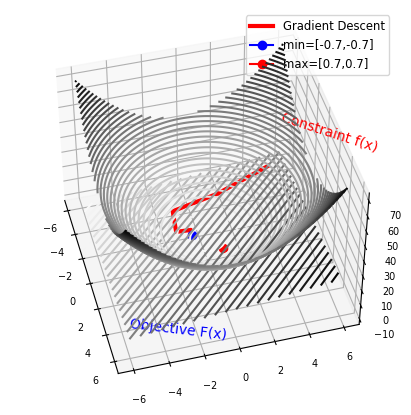

In [17]:
# Plot the graphs
domain = np.array([-6.,6.],dtype=float)
F = lambda x: x[0] + x[1]
f = lambda x: x[0]**2 + x[1]**2 + 1

# Critical Points
min_ = [-np.sqrt(2)/2, -np.sqrt(2)/2]
max_ = [np.sqrt(2)/2, np.sqrt(2)/2]

samples = 100
path = None

# Generate surface dataset
x0_i = np.linspace(domain[0],domain[1], samples)
x1_i = np.linspace(domain[0],domain[1], samples)
x, y = np.meshgrid(x0_i, x1_i)
Z = F(([x,y]))
z = f(([x,y]))

# Create the optimization path using scipy
x_a = np.array([-5.,5.], dtype=float)
constraint1 = ({"type": "eq", "fun": lambda x: x[0]**2 +x[1]**2 - 1})
constraints = ([constraint1,])

# Capture optimization path
path = list()
path.append(x_a)
callback = lambda arg: path.append(arg)
# Run optimizer
ret = optimize.minimize(F, x_a, constraints=constraints, callback=callback)
x_star = ret.x
print(f"Minimizer x* => x1: {x_star[0]:.6f} x2: {x_star[0]:.6f}")
# Convert list to np type
path = np.array(path)

# Create Graph    
fig = plt.figure(figsize=(6,5))
ax = plt.axes(projection="3d")
# Gradient descent path
ax.plot(path[:,0], path[:,1], "-", color="r", linewidth=3, label="Gradient Descent")
# Show objective function
ax.contour3D(x, y, Z, samples, cmap="binary", levels=40)
# Show constraint function
ax.contour3D(x, y, z, samples, cmap="binary", levels=40)

# Label the surfaces
ax.text(-6, 6, 0, "Constraint f(x)", (1,1,1), color="red",  zorder=10)
ax.text(6, -6, 0,"Objective F(x)", (-1,-3,3), color="Blue",  zorder=1)
# Rotate to view
ax.view_init(45,-15)

# Plot minimum
plt.plot(min_[0], min_[1], c="b", marker="o", label="min=[{x0:.1f},{x1:.1f}]".format(x0=min_[0],x1=min_[1]))
# Plot Maximum
plt.plot(max_[0], max_[1], c="r", marker="o", label="max=[{x0:.1f},{x1:.1f}]".format(x0=max_[0],x1=max_[1]))
plt.legend(fontsize="small")
plt.show()

## 1.3 Convex and Concave Functions
### 1.3.1 Convex Functions
A function f(x) is called convex on an interval if, for any two points $x_1$ and $x_2$ in the interval and any $\lambda \in [0,1]$, the following holds:

\begin{align}
f\big(\lambda x_1 + (1-\lambda)x_2\big) \leq \lambda f(x_1) + (1-\lambda)f(x_2) \qquad (x.1)
\end{align}

Moreover, the following inequality must also hold $f(\lambda x_1 + (1-\lambda)x_2) \leq \lambda$. This means the graph of the convex function always lies below or on the ***chord***, where chord is the straight line connecting $x_1$ and $x_2$.

**Features**
1. ***Tangent Line***. At any point on the graph, the tangent line lies below the graph of the function

2. ***Chord***. The line segment between any two points on the graph liss above or on the graph of the function

**Examples**

Prove that $f(x)=x^2$ is a convex function using the identity.\
\begin{align}
f(\lambda x_1 + (1-\lambda)x_2 &\leq \lambda f(x_1) + (1-\lambda)f(x_2)\\
f(\lambda x_1 + (1-\lambda)x_2) &= (\lambda x_1 + (1-\lambda)x_2)^2\\
(\lambda x_1 + (1-\lambda)x_2)^2 &= \lambda^2x_1^2 + 2\lambda(1-\lambda)x_1x_2 + (1-\lambda)^2x_2^2\\
\text{On the right hand, we have:}\\
\lambda f(x_1) + (1-\lambda)f(x_2) &= \lambda x_1^2 + (1-\lambda)x_2^2\\
\text{Comparing both sides:}\\
\lambda^2x_1^2 + 2\lambda(1-\lambda)x_1x_2 + (1-\lambda)^2x_2^2 &\leq \lambda x_1^2 + (1-\lambda)x_2^2\\
\text{Since } 2\lambda(1-\lambda)x_1x_2 &\geq 0 \text{, the inequality holds.}
\end{align}


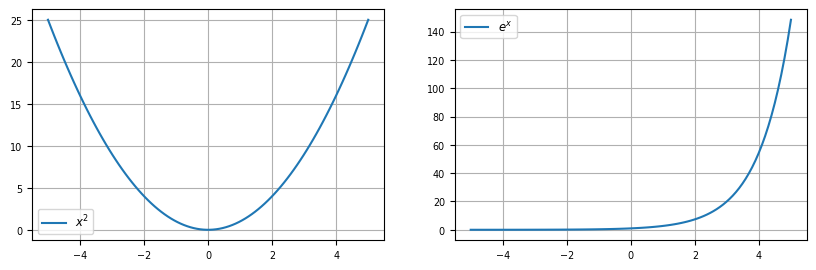

In [18]:
# f(x) = x^2
f=lambda x: x**2
fig, ax = plt.subplots(1,2, figsize=(10,3))
x_i = np.linspace(-5, 5, 100)
y_i = f(x_i)
ax[0].plot(x_i, y_i,label=r"$x^2$")
ax[0].legend()
# f(x) = e^x
f = lambda x: np.exp(x)
y_i = f(x_i)
ax[1].plot(x_i, y_i,label=r"$e^x$")
ax[1].legend()
plt.show()

### 1.3.2 Concave Functions
A function f(x) is called a concave on an interval if, for any two points x_1 and x_2 in the interval and any \lambda \in [0,1], the following conditions exists:

\begin{align}
f\big(\lambda x_1 + (1-\lambda)x_2\big) \geq \lambda f(x_1) + (1-\lambda)f(x_2)
\end{align}

**Features**
1. ***Tangent Line***. At any point on the graph, the tangent line lies above the graph of the function

2. ***Chord***. The line segment between any two points on the graph lies below or on the graph of the function

**Examples**

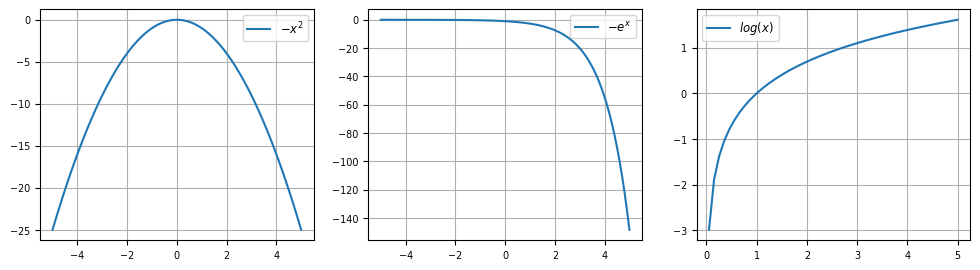

In [19]:
# f(x) = -x^2
f=lambda x: -x**2
fig, ax = plt.subplots(1,3, figsize=(12,3))
x_i = np.linspace(-5, 5, 100)
y_i = f(x_i)
ax[0].plot(x_i, y_i,label=r"$-x^2$")
ax[0].grid(":")
ax[0].legend()
# f(x) = -e^x
f = lambda x: -np.exp(x)
y_i = f(x_i)
ax[1].plot(x_i, y_i,label=r"$-e^x$")
ax[1].grid(":")
ax[1].legend()
# f(x) = log(x)
f = lambda x: np.log(x)
y_i = f(x_i)
ax[2].plot(x_i, y_i,label=r"$log(x)$")
ax[2].grid(":")
ax[2].legend()
plt.show()

### 1.3.3 Test for Convex and Concave Functions
### First Derivative Test
- A function $f(x)$ is convex on an interval if its first derivative is non-decreasing, $f'(x) \geq 0$. Intuitively, the slope of the tangent line is increasing and the graph appears to bend upward.\
- A function f(x) is concave on an interval if its first derivative is non-increasing, $f'(x) \leq 0$. Intuitively, the slope of the tangent line is increasing and the graph appears to bend upward.

**Theorem**. A function $f(x)$ is convex if for any two points $x_1$ and $x_2$ we have:
\begin{align}
f(x_2) \geq f(x_1) + \triangledown f^T(x_1)(x_2-x_1)
\end{align}

**Proof**. If $f(x)$ is ***convex***, we have by definition:
\begin{align}
f\big(\lambda x_2 + (1-\lambda)x_1\big) \leq \lambda f(x_2) + (1-\lambda)f(x_1)
\end{align}

That is\
\begin{align}
f\big(x_1 + \lambda(x_2-x_1)\big) \leq f(x_1) + \lambda\big(f(x_2) - f(x_1)\big)
\end{align}

This equality can be rewritten as\
\begin{align}
f(x_2) - f(x_1) \geq \left\{\frac{f\big(x_1+\lambda(x_2-x_1)\big) - f(x_1)}{\lambda(x_2-x_1)} \right\} (x_2-x_1)
\end{align}

We define $\triangle \lambda(x_2 -x_1)$, we can rewrite as
\begin{align}
f(x_2) - f(x_1) \geq \frac{f(x_1+\triangle x) - f(x_1)}{\triangle x}(x_2-x_1)
\end{align}

By taking the limit as $\triangle x \rightarrow 0$, the inequality becomes:
\begin{align}
f(x_2) - f(x_1) \geq \triangledown f^T(x_1)(x_2-x_1) \qquad (x.1)
\end{align}

which is the expected result. If $f(x)$ is concave, the opposite inequality will hold.


### Second Derivative Test
For a function $f(x)$
- $f"(x) \gt 0$ at a particular point, the function is convex at that point.
- $f"(x) \lt 0$ at a particular point, the function is concave at that point.
- $f"(x) = 0$, the second derivative test is inconclusive and will require othere tests for validation.

**Theorem** A function $f(x)$ is convex if the Hessian matrix $H(x)=\frac{\partial^2f(x)}{\partial x_i \partial x_j}$ is positive definite.

**Proof** From Taylor's Theorem
\begin{align}
f(x^* + h) = f(x^*) + \sum_{i=1}^n h_i\frac{}{}(x^*) + \frac{1}{2!} \sum_{i=1}^n\sum_{j=1}^n h_ih_j \frac{\partial^2f}{\partial x_i \partial x_j}\bigg\vert_{x=x^*+\theta h}
\end{align}
where $0 \lt \theta \lt 1$.

By letting $x^*=x_1$, $x^* + h =x_2$ and $h=x_2-x_1$, the equation above can be rewritten as:
\begin{align}
f(x_2)=f(x_1) + \triangledown f^T(x_1)(x_2-x_1) + \frac{1}{2}(x_2 - x_1)^T H\big(x_1 + \theta(x_2 -x_1)\big)(x_2-x_1)
\end{align}

It can be seen that inequality in Eq.(x.1) is satisfied, hence $f(x)$ will be convex if $H(x)$ is positive semi-definite. Further, if $H(x)$ is positive definite, the function $f(x)$ will be strictly convex. It can be also proven that $f(x)$ is concave if the Hessian matrix is negative semi-definite.

**Theorem** Any local minimum of a convex function f(x) is a global minimum.

**Proof** By contradiction, suppose there exist two different local minima say, $x_1$ and $x_2$, for the function $f(x)$. Let $f(x_2) \lt f(x_1)$. Since $f(x)$ is convex, $x_1$ and $x_2$, for the function $f(x)$. Let $f(x_2) \lt f(x_1)$. Since $f(x)$ is convex, $x_1$ and $x_2$ have to satisfy the relation Eq.(x.6)

\begin{align}
f(x_2) - f(x_1) &\geq \triangledown f^T(x_1)(x_2-x_1) \qquad &(x.1)\\
&\text{or}\\
\triangledown f^T(x_)S &\leq 0 \qquad &(x.2)
\end{align}

where $S=(x_2 - x_1)$ is a vector joining the points $x_1$ to $x_2$. Eq.(x.2) indicates that the value of the function $f(x)$ can be decreased further by moving in the direction $S=(x_2-x_1)$ from point $x_1$. This conclusion contradicts the original assumption that $x_1$ is a local minimum. Thus, there cannot exist more than one minimum for a convex function.

**Examples** Determine whether the following functions are convex or concave.\
(a) $f(x) = e^x$\
(b) $f(x) = -8x^2$\
(c) $f(x_1,x_2) = 3x_1^3-6x_2^2$\
(d) $f(x_1,x_2,x_3) = 4x_1^2 + 3x_2^2 + 5x_3^2 + 6x_1x_2 + x_1x_3 - 3x_1 - 2x_2 + 15$

**Solutions**\
(a)
\begin{align}
f(x) &= e^x\\
H(x) &= \frac{d^2f}{dx^2} = e^x \gt 0 \quad \text{ forall } x\\
\text{Hence, } &f(x) \text{ is strictly convex.}
\end{align}

(b)
\begin{align}
f(x) &= -8x^2\\
H(x) &= \frac{d^2f}{dx^2}[-8x^2] = -16 \lt 0 \quad \text{ forall real values of } x\\
\text{Hence, } &f(x) \text{ is strictly concave.}
\end{align}

(c)
\begin{align}
f(x) &= 2x_1^3 - 6x_2^2\\
H(x) &= \left[\array{
\frac{\partial^2f}{\partial x_1^2} & \frac{\partial^2f}{\partial x_1^2}\\
\frac{\partial^2f}{\partial x_1\partial x2}&\frac{\partial^2f}{\partial x_2^2}
}\right]=\left[\array{
12x_1 & 0 \\
0 & -12
}\right]
\end{align}

Here $\frac{\partial^2 f}{\partial x_1^2}=12x_1 \leq 0$ for $x_1 \leq 0$ and $\geq 0$ for $x_1 \geq 0$, and \
$|H(x)|=-144x_1 \geq 0$ for $x_1 leq 0$ and $\leq 0$ for $x_1 \geq 0$.

Hence, $H(x)$ will be negative semi-definite and $f(x)$ is concave for $x_1 \leq 0$.

\begin{align}
f(x_1,x_2,x_3) &= 4x_1^2 + 3x_2^2 + 5x_3^2 + 6x_1x_2 + x_1x_3 - 3x_1 - 2x_2 + 15\\
H(x)&=\left[\array{
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1\partial x_2} & \frac{\partial^2 f}{\partial x_1\partial x_3} \\
\frac{\partial^2 f}{\partial x_1\partial x_2} & \frac{\partial^2 f}{\partial x_2^2} & \frac{\partial^2 f}{\partial x_2\partial x_3} \\
\frac{\partial^2 f}{\partial x_1\partial x_3} & \frac{\partial^2 f}{\partial x_2\partial x_3} & \frac{\partial^2 f}{\partial x_3^2} \\
}\right]\\
&=\left[\array{
8&6&1\\
6&6&0\\
1&0&10\\
}\right]
\end{align}

The principal minors are\
\begin{align}
\left|8\right| &= 8 \gt 0\\
\left|\array{
8&6\\
6&6\\
}\right| &=12 \gt 0\\
\left|\array{
8&6&1\\
6&6&0\\
1&0&10\\
}\right| &=114 \gt 0\\
\end{align}

Hence, the matrix $H(x)$ is positive definite for all real values of $x_1$, $x_2$, and $x_3$. Therefore, $f(x)$ is strictly a convex function.

### Jensen's Inequality
Let $X$ be a random variable, and $f$ be a convex function. Then Jensen's Inequality states that $f(E[X]) \leq E[f(X)]$. This inequality holds if $f$ is a convex function and $X$ is a random variable with finite expectation.

In other words, consider a random variable $X$ with finite number of outcomes $x_1,x_2,\cdots,x_n$ occurring with probabilities $p_1,p_2,\cdots,p_n$, respectively.

\begin{align}
f(E[X]) &\leq E[f(X)]\\
\text{where: }\qquad&\\
E[X] &= p_1x_1 + p_2x_2 + \cdots + p_nx_n\\
E[f(x)] &= p_1f(x_1) + p_2 f(x_2) +\cdots + p_nf(x_n) 
\end{align}

From Eq.(x.1)
\begin{align}
f\big(\lambda x_1 + (1-\lambda)x_2\big) \leq \lambda f(x_1) + (1-\lambda)f(x_2)
\end{align}

\begin{align}
\underset{f(E[X])}{f(p_1x_1+p_2x_2+\cdots+p_nx_n)} \leq \underset{E[f(X)]}{p_1f(x_1) + p_2f(x_2) +\cdots+p_nf(x_n)}
\end{align}

The expectation $f(E[X])$ is the function of the average value of $X$, in this case the chord, is less than or equal to $E[f(X)]$ which is the average value of the function, the graph of the convex function. 

Convex functions bend upwards so the function of expectation on the left side of the equation is less than or equal to the expectation of the function on the right side.

Conversely, the function $f$ is concave if $f(E[X]) \geq E[f(X)]$.



## 1.4 Karush-Kuhn-Tucker Conditions
**Definition** Consider the non-linear optimization problem
\begin{align}
\min &f(x)\\
\textbf{s.t.} \qquad &\\
g_i(x) &\leq 0\\
h_j(x) &= 0
\end{align}

where $x \in X$ is the optimization variable from a convex subset of $\mathbb{R}^n$. $f$ is the objective or utility function, $g_i(i=1,2,\cdots,m)$ are the inequality constraint functions and $h_j(j=1,2,\cdots,\mathit{l})$ are the equality constraint functions. The numbers of inquality and equality constraints are denoted by $\mathcal{m}$ and $\mathcal{l}$ respectively, then we can form the Lagrangian function:
\begin{align}
\mathcal{L}(x, \mu, \lambda) &= f(x)+\mu^Tg(x) + \lambda^T h(x)\\
\\
\mathcal{L}(x, \alpha) &= f(x) + \alpha^T \left[\array{g(x)\\h(x)}\right]\\
\end{align}


\begin{align}
\\
\text{where:} \qquad
g(x)=\left[\array{g_1(x)\\\vdots\\g_i(x)\\\vdots\\g_m(x)}\right],\quad
h(x)=\left[\array{h_1(x)\\\vdots\\h_i(x)\\\vdots\\h_{\mathcal{l}}(x)}\right],\quad
\mu=\left[\array{\mu_1\\ \vdots \\ \mu_i \\ \vdots \\ \mu_m}\right], \quad
\lambda=\left[\array{\lambda_1\\ \vdots \\ \lambda_i \\ \vdots \\ \lambda_m}\right], \quad
\alpha=\left[\array{u \\ \lambda }\right]
\end{align}

**Theorem** If $(x^*, \alpha^*)$ is a saddle point of $\mathcal{L}(x_a)$ in $x \in X$, $\mu \geq 0$ then $x^*$ is an optimal vector for the above optimization problem satisfying the ***sufficient*** condition.
Suppose that $f(x)$ and $g_i(x), i=1,2,\cdots,m$ are convex in $X$ and that there exists $x_0 \in relint(X)$ such that $g(x_0) \lt 0$. Then with an optimal vector $x^*$ for the above optimization problem there is associated vector $\lambda^*=\left[\array{\mu^*\\\lambda^*}\right]$ satisfying $\mu^* \geq 0$ such that $(x^*, \alpha^*)$ is a saddle point of $\mathcal{L}(x, \alpha)$, thus meeting the ***necessary*** condition.

#### Necessary Conditions
**Theorem** Suppose that the objective function $f:\mathbb{R}^n \rightarrow \mathbb{R}$ and the constraint functions $g_i:\mathbb{R}^n \rightarrow \mathbb{R}$ and $h_j:\mathbb{R}^n \rightarrow \mathbb{R}$ have sub-derivatives at a point $x^* \in \mathbb{R}^n$. If $x^*$ is a local optimum and optimization problem satisfies some regularity conditions, then there exist constants $\mu_i(1,\cdots,m)$ and $\lambda_j(j=1,\cdots,\mathcal{l})$ called ***KKT multipliers*** such that the following conditions hold.

**Stationarity**
\begin{align}
\min f(x)=\partial f(x^*) + \sum_{j=1}^{\ell}\lambda_j \partial h_j(x^*) + \sum_{i=1}^{\mathcal{m}}\mu_i \partial g_i(x^*) \ni 0\\
\\
\max f(x)= -\partial f(x^*) + \sum_{j=1}^{\ell}\lambda_j \partial h_j(x^*) + \sum_{i=1}^{\mathcal{m}}\mu_i\partial g_i(x^*) \ni 0\\\\
\end{align}

**Primal Feasibility**
\begin{align}
h_j(x^*) =  0. for j=1,\cdots,\ell\\
\\
g_i(x^*) =  0. for i=1,\cdots, m
\end{align}

**Dual Feasibility**
\begin{align}
\mu_i \geq 0, for i=1,\cdots,m
\end{align}

**Complementary Slackness**
\begin{align}
\sum_{i=1}^m \mu_i g_i(x^*) = 0
\end{align}

**Theorem**
If there exists a solution $x^*$ to the primal problem, a solution $(\mu^*,\lambda^*)$ to the dual problem, such that together the satisfy the KKT sufficient conditions, then the problem pair hat strong duality, and $x^*,(\mu^*,\lambda^*)$ is a solution pair to the primal and dual problems.

If the problem pair has strong duality, then for any solution $x^*$ to the primal problem and any solution (\mu^*, \lambda^*) to the dual problem, the pair $x^*, (\mu^*, \lambda^*)$ must satisfy the KKT necessary conditions.

**Proof** First, for the $x^*, (\mu^*, \lambda^*)$ to satisfy the KKT conditions is equivalent to them being a Nash equilibrium. Fix  $(\mu^*, \lambda^*)$ and vary $x$: equilibrium is equivalent to primal stationarity.

Fix $x^*$ and vary $(\mu,\lambda)$: equilibrium is equivalent to primal feasibility and complementary slackness.

Sufficiency: the solution pair $x^*, (\mu^*, \lambda^*)$ satisfies the KKT conditions, thud is a Nash equilibrium, and therefore closes the duality gap.

Necessity: any solution pair $x^*, (\mu^*, \lambda^*)$ must close the duality gap. thus they must constitute a Nash equilibrium since neither side could do any better, thus they satisfy the KKT conditions.


**Example 1** Condider a problem where the objective function and constraints.

\begin{align}
&\max\min Z=f(x)\\
\text{s.t.}&\\
&g_i(x) \leq b_i, (i=1,2,\cdots)\\
&g_k(x) \geq b_k, (k=1,2,\cdots)\\
&g_m(x) = b_m, (m=1,2,\cdots)\\
&x \geq 0 \\
\text{where:}&\\
&x=\left\{\array{
x_1\\x_2\\\cdots\\x_n
}\right\}
\end{align}

The approach in using Kuhn-Tucker conditions to obtain a solution to a non-linear optimization problem is to introduce Lagrange multipliers to transform the problem into a single objective function with no constraints. Applying this to the objective function and constraint functions gives:

\begin{align}
&L(x,\lambda, u, v) = f(x) \sum_i \lambda_i(b_i - g_i(x)) + \sum_k u_k(b_k-g_k(x)) + \sum_m v_m(b_m-g_m(x))\\
\text{where:}&\\
&\lambda, u, k:  \text{vectors of control variables/Lagrange multipliers associated with 'less than', 'greater than', and 'equal-to' constraints respectively.}
\end{align}

Necessary conditions:
\begin{align}
\triangledown_x L() = 0\\
\triangledown_{\lambda} L() = 0\\
\triangledown_{u} L() = 0\\
\triangledown_{v} L() = 0\\
\end{align}

Sufficient conditions: These conditions are identical to the requirements of th Lagrange Multipliers for equality constraints. The Kuhn-Tucker Conditions, however, specify additional requirements for a stationary point to be a globale minimum. Further the specifications differ, depending upon whether is a global minimum or a global maximum that is sought for the objective function.

Consider a minimization problem:
\begin{align}
&\min f(x) \\
\text{s.t. :}&\\
&g_i(x) \leq b_i, (i=1,2,\cdots)\\
&g_k(x) \geq b_k, (k=1,2,\cdots)\\
&g_m(x) = b_m, (m=1,2,\cdots)\\
\end{align}

The Kuhn-Tucker approach becomes:

\begin{align}
&\min L(x,\lambda,u,v) = f(x) + \sum_i \lambda_i(b_i - g_i(x)) + \sum_k u_k(b_k - g_k(x)) + \sum_m v_m(b_m-g_m(x))\\
\text{s.t. to constraint conditions}:&\\
& x_j \geq 0 \text{ and } \frac{\partial L}{\partial x_j} \geq 0, \qquad (j=1,2,\cdots, n)\\
& \text{If } \lambda_i=0, \text{ then } b_i - g_i(x) = 0\\
& \text{ else } \text{ else if } b_i - g_i(x) -0\\
& \text{ else if } \text{u_k - 0} b_i - g_i(x) -0\\
\end{align}

Sufficient conditions:
\begin{align}
&f(x) &\text{ convex functon}\\
&g_i(x) &\text{ convex functon}\\
&g_k(x) &\text{ is a concave function}\\
&g_m(x) &\text { is a linear function}\\
\end{align}

**Example 2** Consider the maximization problem:

\begin{align}
&\max Z=f(x)\\
\text{s.t.:}&\\
&g_i(x) \leq b_i, (i=1,2,\cdots)\\
&g_k(x) \geq b_k, (k=1,2,\cdots)\\
&g_m(x) = b_m, (m=1,2,\cdots)\\
\end{align}

The Kuhn-Tucker conditions become:

\begin{align}
&\max L(x,\lambda,u,v) = f(x) + \sum_i \lambda_i(b_i - g_i(x)) + \sum_k u_k (b_k - g_k(x)) + \sum_k v_m (b_m - g_m(x))\\
\text{s.t. necessary conditions}&\\
&x_j \geq 0 \text{ and } \frac{\partial L}{\partial x_j} \leq 0, (j=1,2,\cdots,n)\\
&If \lambda_i = 0, \text{ then } b_i-g_i(x) \geq 0, &\text{(inactive constraint)}\\
&\text{Else if } b_i-g_i(x) = 0, \text{ then } \lambda_i \geq 0, &\text{(active constraint)}\\
&\text{If } u_k=0, \text{ then }, b_k - g_k(x) \leq 0, &\text{(inactive constraint)}\\
&\text{Else if } b_k-g_k(x) = 0, \text{ then } u_k \leq 0, &\text{(active constraint)}\\
&v_m \text{ is unrestricted in sign and } b_m -g_m(x) = 0
\end{align}

The Kuhn-Tucker sufficient conditions:
\begin{align}
&f(x) &\text{ is a concave function}\\
&g_i(x) &\text{ is a convex function}\\
&g_k(x) &\text{ is a concave function}\\
&g_m(x) &\text{ is a linear function}
\end{align}

Note that neither the KKT conditions nor Lagrangian approach require $x_i \geq 0$.


**Example 3** Solve the following problem by using KKT conditions

\begin{align}
&\min f=2x_1 + x_1x_2 + 3x_2\\
\text{s.t.}&\\
&x_1^2 + x_2 \geq 3
\end{align}

***Solution***:\
Rewrite the non-linear constraint\
\begin{align}
g = x_1^2 + x_2 - 3 \geq 0\\
\end{align}

Formulate the Kuhn-Tucker problem and conditions
\begin{align}
&\min h = 2x_1 + x_1x_2 + 3x_2 - \lambda \big(x_1^2 + x_2 - 3\big)\\
\text{Constraints partial derivatives:}&\\
&\frac{\partial h}{\partial x_1} = 2 + x_2 - 2\lambda x_1 = 0\\
&\frac{\partial h}{\partial x_2} = 2 + 3 - \lambda = 0\\
&\frac{\partial h}{\partial \lambda} = x_1^2 + x_2 - 3 \geq 0\\
&\lambda(x_1^2 + x_2 - 3 = 0 \\
&\lambda \geq 0
\end{align}

The solution approach for resolving the constraint derivatives is to assume the constraint is non-binding (i.e., assume $\lambda=0$) and then obtain a solution for $x_1$, $x_2$, and $g$. The solution is checked to verify that the other Kuhn-Tucker conditions are met. If so, the solution is optimal. Otherwise, the assumtion must have been incorrect and the constraint must be binding. In this case, a different solution for $x_1$, $x_2$, and $\lambda$ can be found.

Setting $\lambda=0$ and solving the constraint derivatives yields $x_1=-3$, $x_2=-2$, and $g= 4 \geq 0$.

\begin{align}
&\min h = 2x_1 + x_1x_2 + 3x_2 - \mathsf{\lambda \big(x_1^2 + x_2 - 3\big)}\\
&\min h = 2x_1 + x_1x_2 + 3x_2\\
&\frac{\partial h}{\partial x_1} = 2 + x_2=0\\
&\frac{\partial h}{\partial x_2} = x_1 + 3=0\\
\end{align}

### Reference
[1] [Engineering Optimization: Theory and Practice. Fifth Ed.2020, S.Rao](https://www.amazon.com/Engineering-Optimization-Practice-Singiresu-Rao/dp/1119454719)

[2] [Convex Optimization Algorithms. D. Bertsekas](https://www.amazon.com/Convex-Optimization-Algorithms-Dimitri-Bertsekas/dp/1886529280/ref=pd_bxgy_thbs_d_sccl_1/130-2630855-1013460?pd_rd_w=8IYzj&content-id=amzn1.sym.53b72ea0-a439-4b9d-9319-7c2ee5c88973&pf_rd_p=53b72ea0-a439-4b9d-9319-7c2ee5c88973&pf_rd_r=AQF9VQM12CVK6ZTEQGBS&pd_rd_wg=eH95d&pd_rd_r=7da45e0a-140f-4477-89ba-05efc5e234b6&pd_rd_i=1886529280&psc=1)

[3] [Convex Functions, wiki](https://en.wikipedia.org/wiki/Convex_function)

[4] [Lagrange Multiplier, wiki](https://en.wikipedia.org/wiki/Lagrange_multiplier)

[5] [Karush-Kuhn-Tucker Conditions, wikipedia](https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions)